### Integrantes: 

* Cote Chavarría Héctor Alonso
* García Reyes Carlos Alberto
* Méndez Guzmán Guadalupe


### Ejercicio 2 



Ajuste una Maquina de Soporte Vectorial a los datos del ejericicio anterior.


* Aplique OneHotEncoder a las variables categóricas.
* Ajuste un kernel lineal
* Compare su resultado de ese mismo subconjunto contra un modelo de regresión logı́stica.
* De los modelos anteriores obtenga la matriz de confusión y la curva ROC.
* Haga una optimización de hiperpametros priorizando la precisión.
* Haga una gráfica de Precision-Recall vs Threshold


In [224]:
# Omitimos los avisos que podamos generar.

warnings.filterwarnings('ignore')

In [225]:
#Cargamos las bibliotecas necesarias para el funcionamiento.
import pandas                  as pd                     # Manejo y manipulación de dataframes.
import scipy
import numpy                   as np                     # Soporte matricial y vectorial.
import matplotlib.pyplot       as plt                    # Graficos.
import joblib
from   sklearn.model_selection import GridSearchCV       # Optimización de hiperparametros.
from   sklearn                 import metrics            # Metricas de validación.
from   sklearn.model_selection import train_test_split   # Segmentación de muestra.
from   sklearn.linear_model    import LogisticRegression # Clasificador. 
from   sklearn.impute          import SimpleImputer      
from   sklearn.compose         import ColumnTransformer
from   sklearn.pipeline        import Pipeline
from   sklearn.preprocessing   import LabelEncoder
from   sklearn.preprocessing   import OneHotEncoder,StandardScaler
from   sklearn.preprocessing   import KBinsDiscretizer
from   sklearn.metrics         import accuracy_score, precision_score, recall_score, f1_score

In [226]:
# a) Ajuste un One Hot Encoder a las variables categóricas.

In [227]:
# Lo primero que haremos será cargar los datos.

In [228]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

path ='C:/Users/Yo/Desktop/2do Semestre 2020/Multivariado/covid.csv'
covid = pd.read_csv(path)
covid.head(10)

,TIPO PACIENTE,SEXO,OBESIDAD,DIABETES,EPOC,ASMA,CARDIOVASCULAR,RENAL CRONICA,INMUNOSUPRESION,HIPERTENSION,EDAD
0,AMBULATORIO,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,51
1,AMBULATORIO,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,37
2,AMBULATORIO,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,18
3,AMBULATORIO,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,40
4,HOSPITALIZADO,MUJER,NO,SI,NO,NO,NO,SI,NO,SI,78
5,AMBULATORIO,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,67
6,AMBULATORIO,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,8
7,AMBULATORIO,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,38
8,AMBULATORIO,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,31
9,AMBULATORIO,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,32


In [230]:
# Seleccionamos 5000 observaciones.
covid_2 = covid.iloc[0:5000]

print(covid_2)

      TIPO PACIENTE    SEXO OBESIDAD DIABETES EPOC ASMA CARDIOVASCULAR  \
0       AMBULATORIO   MUJER       NO       NO   NO   NO             NO   
1       AMBULATORIO   MUJER       NO       NO   NO   NO             NO   
2       AMBULATORIO  HOMBRE       NO       NO   NO   NO             NO   
3       AMBULATORIO  HOMBRE       NO       NO   NO   NO             NO   
4     HOSPITALIZADO   MUJER       NO       SI   NO   NO             NO   
...             ...     ...      ...      ...  ...  ...            ...   
4995  HOSPITALIZADO   MUJER       NO       NO   SI   NO             NO   
4996    AMBULATORIO  HOMBRE       SI       NO   NO   NO             NO   
4997  HOSPITALIZADO  HOMBRE       NO       NO   NO   NO             NO   
4998  HOSPITALIZADO  HOMBRE       NO       NO   NO   NO             NO   
4999  HOSPITALIZADO  HOMBRE       NO       SI   NO   NO             NO   

     RENAL CRONICA INMUNOSUPRESION HIPERTENSION  EDAD  
0               NO              NO           NO    51  

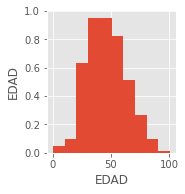

In [231]:
#Observamos el comportamiento de nuestra única variable numérica.

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

smp = sns.pairplot(covid_2)

In [232]:
# Dado nuestro histograma observamos que existe la posisblidad de contar con individuos mayores a 100 años.
# que podrían sesgar nuestros resultados, por lo cual eliminaremos datos con edades mayores a 100 años.

In [233]:
covid_3=covid_2.query("EDAD<100")

In [234]:
# Observamos la proporción de pacientes ambulatorios y hospitalizados.

In [235]:
covid_3["TIPO PACIENTE"].value_counts()

AMBULATORIO      3368
HOSPITALIZADO    1631
Name: TIPO PACIENTE, dtype: int64

In [236]:
# Realizamos One Hot Encoder a las variables categóricas.
# Seleccionamos solo variables categóricas.

X_10 = covid_3.select_dtypes(include=[object])
X_10.head(3)



,TIPO PACIENTE,SEXO,OBESIDAD,DIABETES,EPOC,ASMA,CARDIOVASCULAR,RENAL CRONICA,INMUNOSUPRESION,HIPERTENSION
0,AMBULATORIO,MUJER,NO,NO,NO,NO,NO,NO,NO,NO
1,AMBULATORIO,MUJER,NO,NO,NO,NO,NO,NO,NO,NO
2,AMBULATORIO,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO


In [237]:
# Revisamos nuestro dataset.
covid_3.shape

(4999, 11)

In [238]:
from sklearn import preprocessing
covid_3.columns

Index(['TIPO PACIENTE', 'SEXO', 'OBESIDAD', 'DIABETES', 'EPOC', 'ASMA',
       'CARDIOVASCULAR', 'RENAL CRONICA', 'INMUNOSUPRESION', 'HIPERTENSION',
       'EDAD'],
      dtype='object')

In [239]:
le = preprocessing.LabelEncoder()
covid_4 = covid_3.apply(le.fit_transform)
covid_4.head()

,TIPO PACIENTE,SEXO,OBESIDAD,DIABETES,EPOC,ASMA,CARDIOVASCULAR,RENAL CRONICA,INMUNOSUPRESION,HIPERTENSION,EDAD
0,0,1,0,0,0,0,0,0,0,0,51
1,0,1,0,0,0,0,0,0,0,0,37
2,0,0,0,0,0,0,0,0,0,0,18
3,0,0,0,0,0,0,0,0,0,0,40
4,1,1,0,1,0,0,0,1,0,1,78


In [240]:
# Observemos como nuestro One Hot Encoder ha Realizado lo mismo que si hubieramos considera:
# covid_4=covid_3.replace({"NO": 0, "SI": 1, "MUJER":1, "HOMBRE":0, "AMBULATORIO":0,"HOSPITALIZADO":1})
# covid_4.head()

In [241]:
# Dividimos el set en X.
# covid_X = covid_2.iloc[:,2:12].values
covid_X = covid_4.iloc[:,1:12]
print(covid_X)

      SEXO  OBESIDAD  DIABETES  EPOC  ASMA  CARDIOVASCULAR  RENAL CRONICA  \
0        1         0         0     0     0               0              0   
1        1         0         0     0     0               0              0   
2        0         0         0     0     0               0              0   
3        0         0         0     0     0               0              0   
4        1         0         1     0     0               0              1   
...    ...       ...       ...   ...   ...             ...            ...   
4995     1         0         0     1     0               0              0   
4996     0         1         0     0     0               0              0   
4997     0         0         0     0     0               0              0   
4998     0         0         0     0     0               0              0   
4999     0         0         1     0     0               0              0   

      INMUNOSUPRESION  HIPERTENSION  EDAD  
0                   0          

In [242]:
#Dividimos el set en Y.
#covid_Y = covid_3.iloc[:,0:1].values
covid_Y = covid_4.iloc[:,0:1]
print(covid_Y)

      TIPO PACIENTE
0                 0
1                 0
2                 0
3                 0
4                 1
...             ...
4995              1
4996              0
4997              1
4998              1
4999              1

[4999 rows x 1 columns]


In [243]:
# b) Ajuste un Kernel Lineal.

In [244]:
# Dividimos el dataset en entrenamiento y prueba.
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(covid_X, covid_Y, test_size = 0.20)

In [245]:
# Formamos un Kernel Lineal.
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
svm = LinearSVC()
clf = CalibratedClassifierCV(svm) 
clf.fit(X_train_1, y_train_1)
y_proba = clf.predict_proba(X_test_1)

In [246]:
# Observamos los resultados.
y_test_1.shape

(1000, 1)

In [247]:
# Observamos los resultados.
y_proba.shape

(1000, 2)

array([[0.75679012, 0.34736842],
       [0.24320988, 0.65263158]])

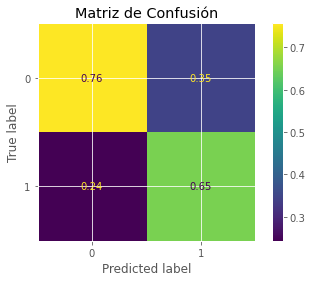

In [248]:
# D.1) Obtenga la matriz de confusión.

import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import datasets
from   sklearn.model_selection import train_test_split
from sklearn import metrics

disp=metrics.plot_confusion_matrix(clf, X_test_1, y_test_1,normalize="pred")
disp.ax_.set_title("Matriz de Confusión")
disp.confusion_matrix

In [249]:
# D.1) Obtenga la curva ROC.
probs = clf.predict_proba(X_test_1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_1, preds)
roc_auc = metrics.auc(fpr, tpr)

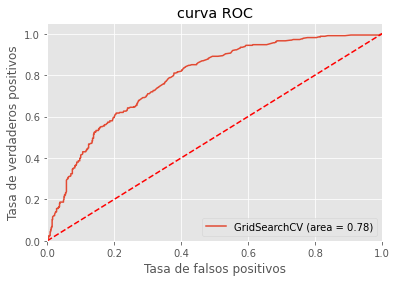

In [251]:
plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('curva ROC')
plt.legend(loc="lower right")
plt.savefig('Linear_ROC')
plt.show()

In [252]:
# Información adicional del modelo.

predictions=clf.predict(X_test_1)
print('Accuracy score: ', format(accuracy_score(y_test_1, predictions)))
print('Precision score: ', format(precision_score(y_test_1, predictions)))
print('Recall score: ', format(recall_score(y_test_1, predictions)))
print('F1 score: ', format(f1_score(y_test_1, predictions)))

Accuracy score:  0.737
Precision score:  0.6526315789473685
Recall score:  0.3862928348909657
F1 score:  0.48532289628180036


In [253]:
# b) Ajuste un modelo de regresión logistica.

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pylab as mp
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools.tools import add_constant

model_log=LogisticRegression(C=1,solver='newton-cg',max_iter =10000).fit(X_train_1,y_train_1)
y_proba_2 = model_log.predict_proba(X_test_1)


In [255]:
# Observamos los resultados.
y_test_1.shape

(1000, 1)

In [256]:
# Observamos los resultados.
y_proba_2.shape

(1000, 2)

array([[0.78858625, 0.31004367],
       [0.21141375, 0.68995633]])

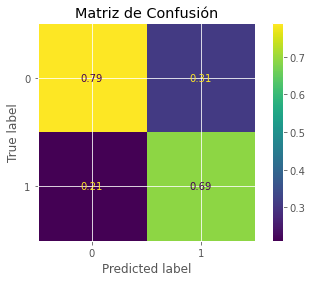

In [258]:
# D.2) Obtenga la matriz de confusión.

import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import datasets
from   sklearn.model_selection import train_test_split
from sklearn import metrics

disp=metrics.plot_confusion_matrix(model_log, X_test_1, y_test_1,normalize="pred")
disp.ax_.set_title("Matriz de Confusión")
disp.confusion_matrix

In [259]:
# D.2) Obtenga la curva ROC.
probs = model_log.predict_proba(X_test_1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_1, preds)
roc_auc = metrics.auc(fpr, tpr)

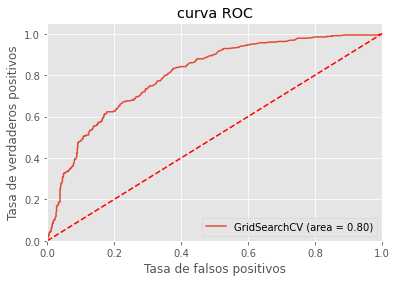

In [260]:
plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('curva ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [261]:
# Información adicional del modelo

predictions=model_log.predict(X_test_1)
print('Accuracy score: ', format(accuracy_score(y_test_1, predictions)))
print('Precision score: ', format(precision_score(y_test_1, predictions)))
print('Recall score: ', format(recall_score(y_test_1, predictions)))
print('F1 score: ', format(f1_score(y_test_1, predictions)))

Accuracy score:  0.766
Precision score:  0.6899563318777293
Recall score:  0.49221183800623053
F1 score:  0.5745454545454545


In [269]:
!pip install joblib

In [270]:
# E) Haga una optimización de hiperparámetros priorizando la precisión.
# En clase se comentó que el presente ejercicio y el siguiente se deben de ejercer sobre el modelo de regresión log.

#crea un pipeline para generar el modelo
def modelo(X_train, y_train,numeric_features,categorical_features):
    numeric_transformer = Pipeline(steps=[
    ('imputer', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile'))])
    categorical_transformer = Pipeline(steps=[
        #imputacion por el valor más frecuente
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    #onehot encoder para las varibales categoricas    
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    #el pipeline con el procesamienot y el claificador
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', gridsearh())])
    modelo=clf.fit(X_train, y_train)
    return modelo




In [271]:
# El grid search prueba con varios modelos usando holdout 70-30.
def gridsearh():
    clf = LogisticRegression(fit_intercept=True,solver='lbfgs',tol=1e-5,max_iter=75,n_jobs=8)
    grid_values = {'penalty': [ 'l2'],'C':np.logspace(-5, 5, 100)}
    """se evalúan todas las combinaciones posibles de valores de parámetros y 
    se conserva la mejor combinacion."""   
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'precision')
    return grid_clf_acc

In [272]:
y=LabelEncoder().fit_transform(covid_3["TIPO PACIENTE"])
X=covid_3.drop(["TIPO PACIENTE"],axis=1)
X.head(1)

,SEXO,OBESIDAD,DIABETES,EPOC,ASMA,CARDIOVASCULAR,RENAL CRONICA,INMUNOSUPRESION,HIPERTENSION,EDAD
0,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,51


In [273]:
# El score obtenido con el modelo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
categorical_features = ['SEXO','OBESIDAD','DIABETES','EPOC','ASMA','CARDIOVASCULAR','RENAL CRONICA',"INMUNOSUPRESION","HIPERTENSION"]
numeric_features=['EDAD']
modelo=modelo(X_train, y_train,numeric_features,categorical_features)
print("model score: %.3f" % modelo.score(X_test, y_test))

model score: 0.777


array([[0.68002863, 0.22330097],
       [0.31997137, 0.77669903]])

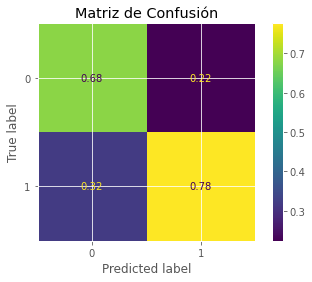

In [274]:
# Obtenemos la matriz de confusión.

import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import datasets
from   sklearn.model_selection import train_test_split
from sklearn import metrics

disp=metrics.plot_confusion_matrix(modelo, X_test, y_test,normalize="pred")
disp.ax_.set_title("Matriz de Confusión")
disp.confusion_matrix

In [275]:
# Obtenemos la curva ROC.

probs = modelo.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

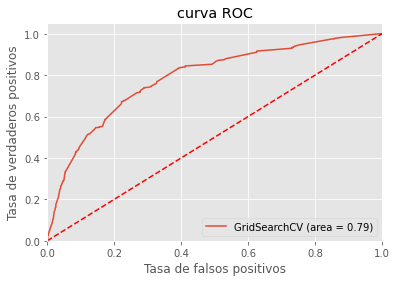

In [276]:
plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('curva ROC')
plt.legend(loc="lower right")
plt.savefig('Hyp_ROC')
plt.show()

In [277]:
# Información adicional del modelo.

predictions=modelo.predict(X_test)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.6866666666666666
Precision score:  0.7766990291262136
Recall score:  0.15180265654648956
F1 score:  0.25396825396825395


(0.0, 1.0)

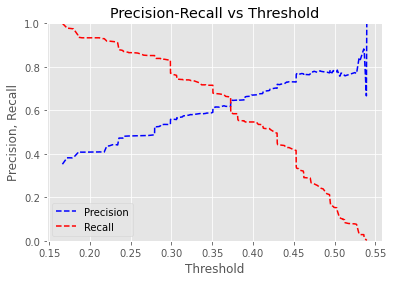

In [278]:
# Haga una gráfica de Precision-Recall vs Threshold.

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs[:,1]) 
pr_auc = metrics.auc(recall, precision)
plt.title("Precision-Recall vs Threshold")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])